In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import BoxSelectTool, LassoSelectTool
from bokeh.plotting import curdoc, figure
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import curdoc, figure, output_notebook, show
from bokeh.transform import cumsum
from bokeh.io import output_file, show
from bokeh.layouts import row, gridplot

In [3]:
#import initial datasets
Raw_data = pd.read_csv('./Dataset-Movie-details.csv')

In [4]:
#show details of the csv
Raw_data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Business goal 1 - compare Run time.

To get French movie dataset and Non-French movie dataset.

In [8]:
#get dataset that language is not missing
Raw_data_LnNA = Raw_data[Raw_data['Language'].notna()]

In [6]:
#get the index that language is French or released in France
French_index = (Raw_data_LnNA['Language'].str.contains('French'))|(Raw_data_LnNA['Country'].str.contains('France'))

#get the France made movies
French_movies = Raw_data_LnNA[French_index].reset_index().drop(['index'],axis=1)

In [7]:
French_movies

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Pianist,2002,18+,8.5,95%,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
2,Django Unchained,2012,18+,8.4,87%,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
3,Inglourious Basterds,2009,18+,8.3,89%,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0
4,Monty Python and the Holy Grail,1975,7+,8.2,97%,"Terry Gilliam,Terry Jones","Adventure,Comedy,Fantasy",United Kingdom,"English,French,Latin",91.0
...,...,...,...,...,...,...,...,...,...,...
1176,The Other Me,2000,all,6.1,NaN,Sotiris Tsafoulias,"Crime,Drama,Mystery,Thriller",Greece,"Greek,French",101.0
1177,Three Days,2001,all,7.2,NaN,Paul Haggis,"Action,Crime,Drama,Romance,Thriller","United States,France",English,133.0
1178,Diving with Dolphins,2020,NaN,7.5,NaN,Keith Scholey,Documentary,United States,"English,French",79.0
1179,Penguins: Life on the Edge,2020,NaN,6.9,NaN,"Alastair Fothergill,Jeff Wilson","Documentary,Family",United States,"English,French",78.0


In [8]:
#export to csv
French_movies.to_csv('./French_movies.csv')

In [9]:
#get the index that is reverse to French movies
non_French_index = ~French_index
non_French_movies = Raw_data_LnNA[non_French_index].reset_index().drop(['index'],axis=1)

In [10]:
#export to csv
non_French_movies.to_csv('./non_French_movies.csv')

In [11]:
#present statistical infomation
French_movies.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,1181,1181.000000,579,1158.000000,670,1167,1181,1181,1181,1175.000000
unique,1181,NaN,5,NaN,95,1035,392,444,397,NaN
top,Inception,NaN,18+,NaN,100%,Quentin Tarantino,Drama,United States,"English,French",NaN
freq,1,NaN,292,NaN,32,5,134,200,174,NaN
mean,NaN,2004.323455,NaN,6.371503,NaN,NaN,NaN,NaN,NaN,101.510638
std,NaN,18.882250,NaN,1.027723,NaN,NaN,NaN,NaN,NaN,24.793244
min,NaN,1902.000000,NaN,2.100000,NaN,NaN,NaN,NaN,NaN,6.000000
25%,NaN,2003.000000,NaN,5.825000,NaN,NaN,NaN,NaN,NaN,90.000000
50%,NaN,2011.000000,NaN,6.500000,NaN,NaN,NaN,NaN,NaN,100.000000
75%,NaN,2016.000000,NaN,7.100000,NaN,NaN,NaN,NaN,NaN,112.500000


In [12]:
non_French_movies.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,14964,14964.000000,6660,14643.000000,4441,14569,14940,14914,14964,14714.000000
unique,14964,NaN,5,NaN,99,10407,1802,903,761,NaN
top,Carter's Army,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN
freq,1,NaN,3145,NaN,361,35,1175,8449,10789,NaN
mean,NaN,2002.601176,NaN,5.864167,NaN,NaN,NaN,NaN,NaN,93.033302
std,NaN,20.938946,NaN,1.357831,NaN,NaN,NaN,NaN,NaN,28.284869
min,NaN,1912.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,1999.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,82.000000
50%,NaN,2012.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,91.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,103.000000


Text(0.5, 1.0, 'Movie average run time comparison (minutes)')

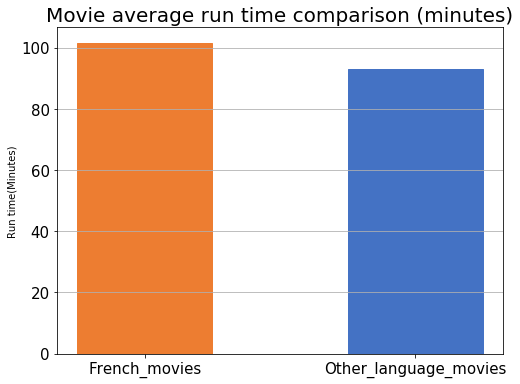

In [10]:
#use matplotlib to plot runtime
fig, ax = plt.subplots()

#set figure size
fig.set_size_inches(8, 6)

#set label size
plt.tick_params(labelsize = 15)

#show grid
ax.yaxis.grid(True)

#show ylabel
plt.ylabel("Run time(Minutes)")

#input data
bars = ax.bar(["French_movies", "Other_language_movies"], [101.51, 93.03], width = 0.5)
bars[0].set_color("#ED7D31")
bars[1].set_color("#4472C4")

#set title
plt.title('Movie average run time comparison (minutes)', fontsize='20', color='Black')

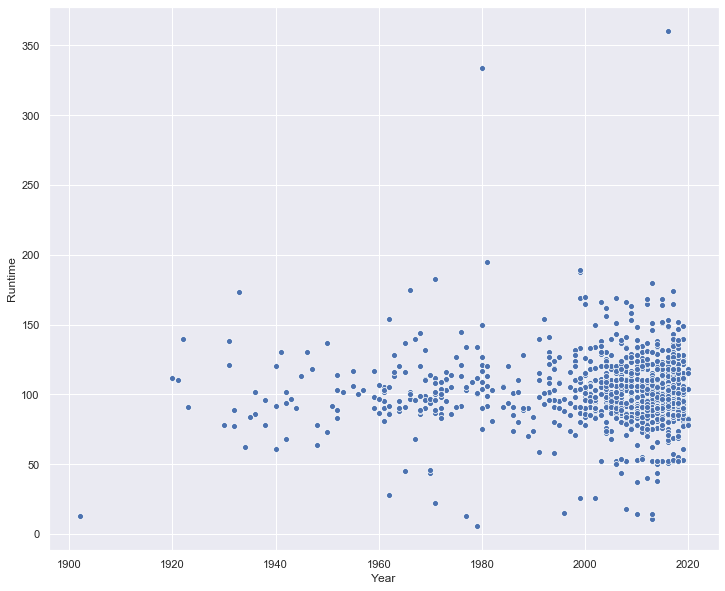

In [25]:
#use seaborn to plot year-runtime 
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(
    data = French_movies,
    x = "Year",
    y = 'Runtime'
)

In [ ]:
#import csv files previously exported
French_movies = pd.read_csv('./French_movies.csv', index_col = 0)
non_French_movies = pd.read_csv('./non_French_movies.csv', index_col = 0)

In [ ]:
#get index that IMDB or Rotten Tomatoes is not null
French_rating_index = (~(French_movies['IMDb'].isnull()))|(~(French_movies['Rotten Tomatoes'].isnull()))

#use the index to filter the data
French_movie_with_rating = French_movies[French_rating_index].reset_index().drop(['index'],axis=1)

#normalization IMDB and RT ratings
French_movie_with_rating.iloc[:, 3] = French_movie_with_rating.iloc[:, 3]*10
French_movie_with_rating.iloc[:, 4] = French_movie_with_rating.iloc[:, 4].apply(lambda x: str(x).split('%')[0] if x != None else x).astype(float)

#add overall rating to column 6
add_allrating_col_name = French_movie_with_rating.columns.tolist()
add_allrating_col_name.insert(5,'Overall rating')

#get the average rating value
French_movie_with_rating = French_movie_with_rating.reindex(columns = add_allrating_col_name)
French_movie_with_rating['Overall rating'] = French_movie_with_rating[['IMDb', 'Rotten Tomatoes']].mean(axis=1)

In [ ]:
#export csv file
French_movie_with_rating.to_csv('./French_movie_with_rating')

In [ ]:
#same method used for non_french movie
non_French_rating_index = (~(non_French_movies['IMDb'].isnull()))|(~(non_French_movies['Rotten Tomatoes'].isnull()))
non_French_movies_with_rating = non_French_movies[non_French_rating_index].reset_index().drop(['index'],axis=1)
non_French_movies_with_rating.iloc[:, 3] = non_French_movies_with_rating.iloc[:, 3]*10
non_French_movies_with_rating.iloc[:, 4] = non_French_movies_with_rating.iloc[:, 4].apply(lambda x: str(x).split('%')[0] if x != None else x).astype(float)
add_allrating_col_name = non_French_movies_with_rating.columns.tolist()
add_allrating_col_name.insert(5,'Overall rating')
non_French_movies_with_rating = non_French_movies_with_rating.reindex(columns = add_allrating_col_name)
non_French_movies_with_rating['Overall rating'] = non_French_movies_with_rating[['IMDb', 'Rotten Tomatoes']].mean(axis=1)
non_French_movies_with_rating.to_csv('./non_French_movies_with_rating')

In [ ]:
#get statistical results
French_movies_with_rating.describe(include='all')
non_French_movies_with_rating.describe(include='all')

In [ ]:
# getting data of the histogram
count1, bins_count1 = np.histogram(French_movie_with_rating['Overall rating'], bins = 20)
  
# finding the PDF of the histogram using count values
pdf1 = count1 / sum(count1)

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf1 = np.cumsum(pdf1)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# plotting PDF and CDF
plt.subplot(121)
plt.grid()
plt.plot(bins_count1[1:], pdf1, color = "green", label="French PDF")
plt.hlines(0.08, 30, 90, linestyles = 'dashed', color = 'red')
plt.ylim(-0.005, 0.13)
plt.xlim(15, 100)
plt.title('French movie Probability density function', fontsize = 18)
plt.xlabel('Movie ratings', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.legend(loc = 2, fontsize = 16)

# getting data of the histogram
count2, bins_count2 = np.histogram(non_French_movies_with_rating['Overall rating'], bins = 20)
  
# finding the PDF of the histogram using count values
pdf2 = count2 / sum(count2)

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf2 = np.cumsum(pdf2)
    
# plotting PDF
plt.subplot(122)
plt.grid()
plt.plot(bins_count2[1:], pdf2, color = "blue", label="Non-French PDF")
plt.hlines(0.08, 30, 90, linestyles = 'dashed', color = 'red')
plt.ylim(-0.005, 0.13)
plt.xlim(10, 100)
plt.title('Non-French movie Probability density function', fontsize = 18)
plt.xlabel('Movie ratings', fontsize = 16)
plt.legend(loc = 2, fontsize = 16)

In [ ]:
#plotting CDF
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.plot(bins_count1[1:], cdf1, color = 'green', label = "French movie CDF")
plt.plot(bins_count2[1:], cdf2, color = 'blue', label = "Non-French movie CDF")
plt.vlines(64.19, 0, 1, linestyles = 'dashed', color = 'green', label = 'Avg. rating of French movies')
plt.vlines(58.88, 0, 1, linestyles = 'dashed', color = 'blue', label = 'Avg. rating of Non-French movies')
plt.title('Cumulative distribution function of movie ratings', fontsize = 18)
plt.xlabel('Movie ratings', fontsize = 16)
plt.ylabel('Cumulative probability', fontsize = 16)
plt.legend(loc = 2, fontsize = 16)

In [ ]:
French_movies.groupby(['Age'],as_index=False)['Age'].agg({'Count':'count'})
French_movies['Age'].value_counts(normalize=True)

In [ ]:
x = {
    'General audience': 38,
    'Age group-7+ yrs old': 69,
    'Age group-13+ yrs old': 79,
    'Age group-16+ yrs old': 15,
    'Age group-18+ yrs old': 187
}

#set pie chart template and colour
data = pd.Series(x).reset_index(name='Count').rename(columns={'index': 'Age'})
data['angle'] = data['Count']/data['Count'].sum() * 2*pi
data['color'] = Category20c[len(x)]

#set size and title
p1 = figure(height=350, title="French movie age group", toolbar_location=None,
           tools="hover", tooltips="@Age: @Count", x_range=(-0.5, 1.0))
#set position of the chart
p1.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Age', source=data)

#delete background grid
p1.axis.axis_label = None
p1.axis.visible = False
p1.grid.grid_line_color = None

show(p1)

In [ ]:
non_French_movies.groupby(['Age'],as_index=False)['Age'].agg({'Count':'count'}) 
non_French_movies['Age'].value_counts(normalize=True)

same method for non-French movies

In [ ]:
x = {
    'General audience': 783,
    'Age group-7+ yrs old': 1364,
    'Age group-13+ yrs old': 1153,
    'Age group-16+ yrs old': 301,
    'Age group-18+ yrs old': 3250
}

data = pd.Series(x).reset_index(name = 'Count').rename(columns = {'index': 'Age'})
data['angle'] = data['Count']/data['Count'].sum() * 2 * pi
data['color'] = Category20c[len(x)]

p2 = figure(height = 350, title = "Non_French movie age group", toolbar_location = None,
           tools = "hover", tooltips = "@Age: @Count", x_range = (-0.5, 1.0))

p2.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Age', source=data)

p2.axis.axis_label = None
p2.axis.visible = False
p2.grid.grid_line_color = None

show(p2)

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(
    data = French_movie_with_rating,
    x = "Year",
    y = 'Age'
)

In [ ]:
#delete missing genres
French_movies_genre_null = French_movies[French_movies['Genres'].isnull()]
French_movies.drop(index = French_movies_genre_null.index, inplace = True)

In [ ]:
#count number of comma +1
French_movies['Genre_count'] = French_movies.Genres.str.count(',') + 1

In [ ]:
#same for non-French movie
non_French_movies_genre_null = non_French_movies[non_French_movies['Genres'].isnull()]
non_French_movies.drop(index = non_French_movies_genre_null.index, inplace = True)
non_French_movies['Genre_count'] = non_French_movies.Genres.str.count(',') + 1
non_French_movies

In [ ]:
French_movie_genre_count = French_movies['Genre_count']
non_French_movies_genre_count = non_French_movies['Genre_count']

In [ ]:
#use seaborn countplot to aggregate genre types
fig, ax = plt.subplots(1,2)
plt.figure(figsize=(20, 16))
sns.countplot(x = French_movie_genre_count, color = 'blue', ax = ax[0])
sns.countplot(x = non_French_movies_genre_count, color = 'green', ax=ax[1])
fig.show()